### Comparing Disease Outbreaks [Covid19,SARS,EBOLA] with Python
+ SARS (Sever Acute Respiratory Syndrome)
+ Ebola
+ Covid19 (Novel Coronavirus 19)

### Data Sources & Credits
+ https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
+ https://github.com/imdevskp
+ https://github.com/reconhub/outbreaks

#### Questions
+ Which countries were affected?
+ How many cases (confirmed/recovered/death) in all?
+ Top countries affected
+ How is the trend for each disease?
+ Day with the max num of case
+ How long did each pandemic last
+ etc

In [1]:
# Load EDA
import pandas as pd
import geopandas as gpd
import descartes

In [2]:
# Load Data Vis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load Dataset
sars = pd.read_csv("dataset/pandemic_sars_dataset.csv")
ebola = pd.read_csv("dataset/pandemic_ebola_dataset.csv")
covid = pd.read_csv("dataset/coronavirus_dataset_20200406-170956.csv")

In [4]:
# Data Analysis of Sars
sars.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
0,2003-03-17,Germany,1,0,0,51.0000,9.0000
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275


In [5]:
sars.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Lat',
       'Long'],
      dtype='object')

In [6]:
# Number of Cases Per day
sars_per_day = sars.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [7]:
sars_per_day

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-07-07,5327,348,4934
2003-07-08,5327,348,4934
2003-07-09,5327,348,4939


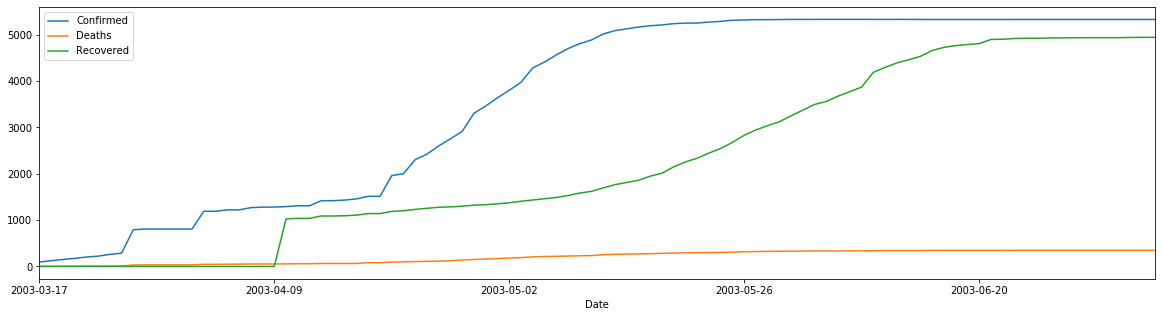

In [9]:
sars_per_day.plot(kind='line',figsize=(20,5))

In [10]:
# Analysis for ebola
ebola.head()

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [11]:
ebola_per_day = ebola.groupby('Date')['Confirmed', 'Deaths'].max()

In [12]:
ebola_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


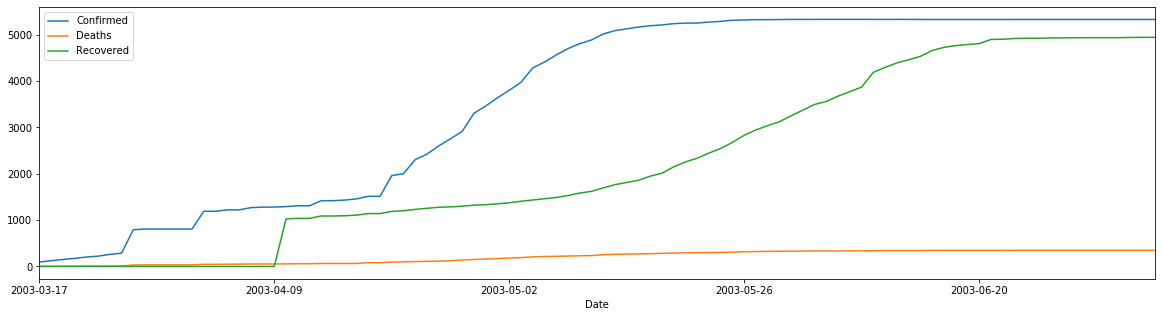

In [14]:
sars_per_day.plot(kind='line',figsize=(20,5))

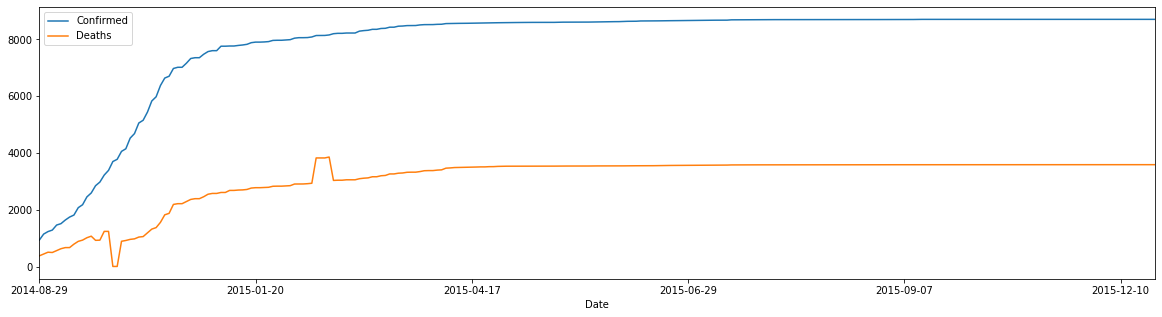

In [13]:
ebola_per_day.plot(kind='line',figsize=(20,5))

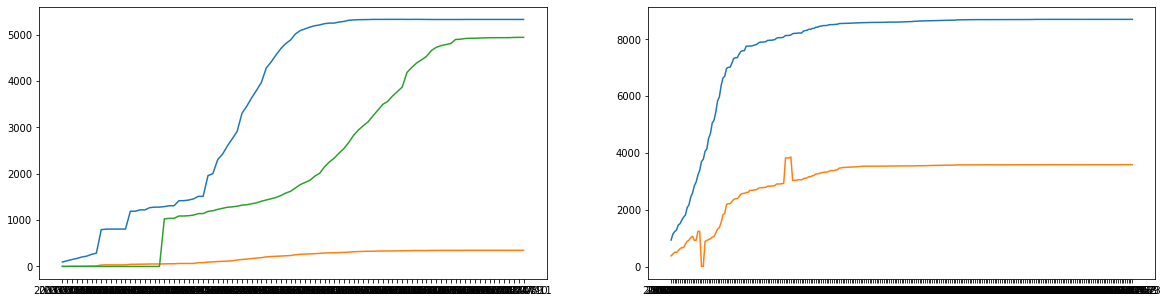

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)

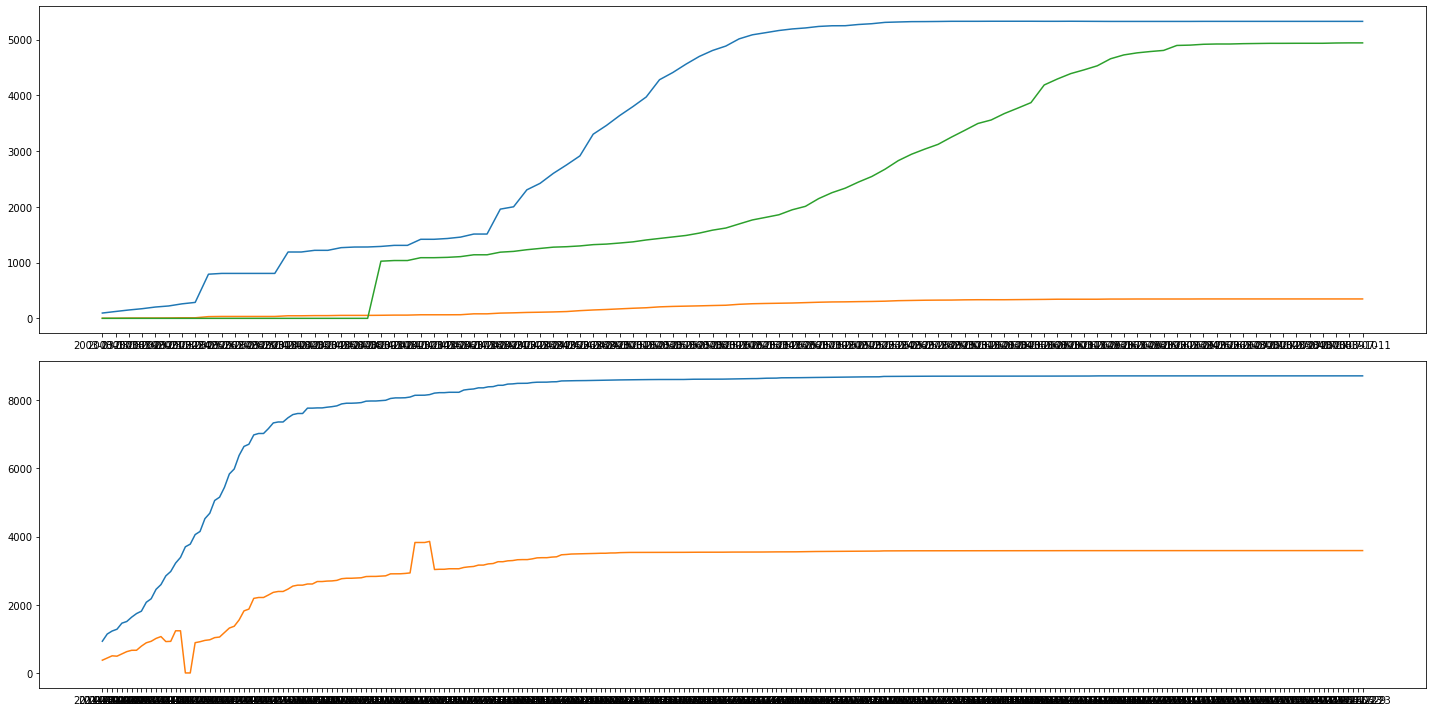

In [17]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
fig.tight_layout()

In [18]:
# Analysis of Covid
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [19]:
covid_per_day = covid.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [20]:
covid_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28.0
1/23/20,444,17,28.0
1/24/20,549,24,31.0
1/25/20,761,40,42.0
1/26/20,1058,52,45.0
...,...,...,...
4/1/20,213372,13155,63945.0
4/2/20,243453,13915,NaN
4/3/20,275586,14681,NaN


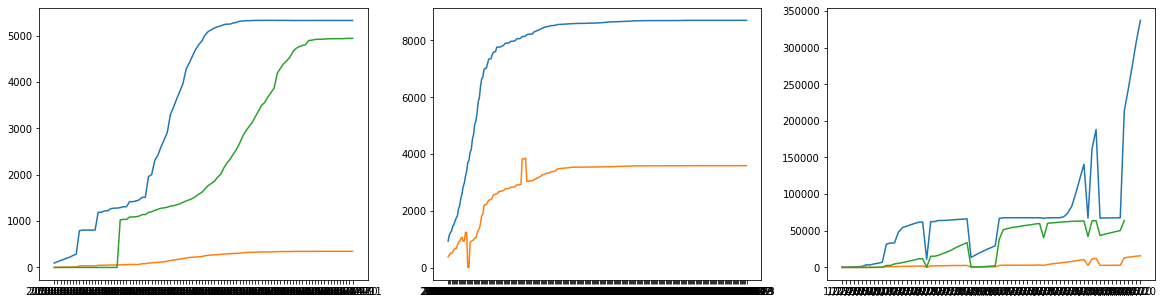

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)

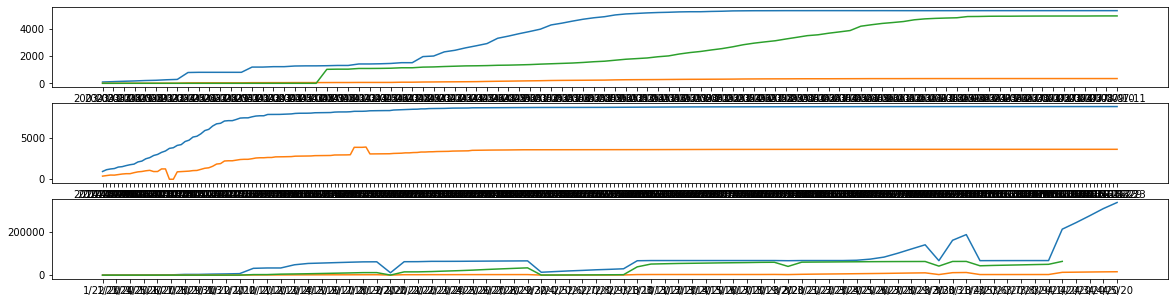

In [22]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)

In [24]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [23]:
### Checking for the first 100 days
import datetime

In [25]:
sars_cases = pd.read_csv("dataset/pandemic_sars_dataset.csv",parse_dates=['Date'],index_col='Date')
ebola_cases = pd.read_csv("dataset/pandemic_ebola_dataset.csv",parse_dates=['Date'],index_col='Date')
covid_cases = pd.read_csv("dataset/coronavirus_dataset_20200406-170956.csv",parse_dates=['Date'],index_col='Date')

In [26]:
sars_cases

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [28]:
# Checking For 1st 100 days
sars_start_date = '2003-03-17'
day_100_sars = 


,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [39]:
sars_start_date = '2003-03-17'

In [40]:
import datetime

In [41]:
datetime.datetime.strptime(sars_start_date,"%Y-%m-%d") + datetime.timedelta(days=100)

datetime.datetime(2003, 6, 25, 0, 0)

In [42]:
def get_100_days(start_date):
    day_100 = datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=100)
    return day_100
    

In [43]:
get_100_days(sars_start_date)

datetime.datetime(2003, 6, 25, 0, 0)

In [46]:
sars_cases['2003-03-17':'2003-6-25']

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-06-25,Switzerland,1,0,1,46.8182,8.2275
2003-06-25,Thailand,9,2,7,15.0000,101.0000
2003-06-25,United Kingdom,4,0,4,21.6940,-71.7979


In [49]:
# Ebola
ebola_start_day = "2014-08-29"
covid_start_day = "2020-01-22"

In [50]:
print(get_100_days(ebola_start_day))
print(get_100_days(covid_start_day))

2014-12-07 00:00:00
2020-05-01 00:00:00


In [51]:
sars_day_100 = sars_cases['2003-03-17':'2003-6-25']
ebola_day_100 = ebola_cases[ebola_start_day:'2014-12-07']
covid_day_100 = covid_cases[covid_start_day:'2020-05-01']

In [56]:
sars_day_100.groupby(sars_day_100.index)['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-06-19,5326,347,4786
2003-06-20,5326,347,4806
2003-06-23,5326,347,4895


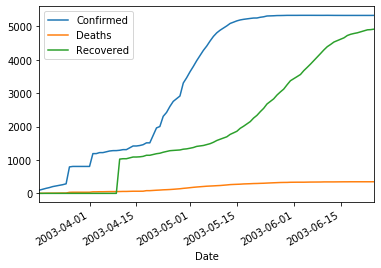

In [57]:
# Plot
sars_day_100.groupby(sars_day_100.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')

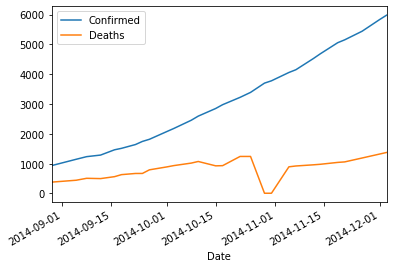

In [58]:
ebola_day_100.groupby(ebola_day_100.index)['Confirmed','Deaths'].max().plot(kind='line')

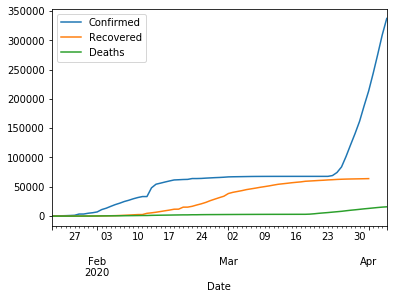

In [59]:
covid_day_100.groupby(covid_day_100.index)['Confirmed','Recovered','Deaths'].max().plot(kind='line')

In [60]:
### Top COuntries Affected
ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889
...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300


In [61]:
grp_countries_ebola = ebola.groupby('Country/Region')['Confirmed','Deaths'].max()

In [62]:
grp_countries_ebola

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


In [63]:
# Countries Affected
grp_countries_ebola

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


In [65]:
# Number of Countries Affected
len(ebola['Country/Region'].unique())

10

In [66]:
# Number of Countries Affected
len(covid['Country/Region'].unique())

183

In [67]:
# Number of Countries Affected
len(sars['Country/Region'].unique())

36

In [68]:
# Top Countries Affect by Confirmed Cases
grp_countries_ebola.nlargest(3,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Liberia,3153.0,3858.0


In [69]:
# Top Countries Affect By Death
grp_countries_ebola.nlargest(3,'Deaths')

,Confirmed,Deaths
Country/Region,,
Liberia,3153.0,3858.0
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0


In [70]:
# Sars
grp_countries_sars = sars.groupby('Country/Region')['Confirmed','Recovered','Deaths'].max()
# Covid
grp_countries_covid = covid.groupby('Country/Region')['Confirmed','Recovered','Deaths'].max()

In [72]:
# Top Countries Affect By Death
grp_countries_sars.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
Singapore,206,172,32
Vietnam,63,58,5
Malaysia,8,5,2
Philippines,14,12,2
Thailand,9,7,2


In [73]:
# Top Countries Affect By Confirmed
grp_countries_sars.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
US,220,67,0
Singapore,206,172,32
Vietnam,63,58,5
Philippines,14,12,2
Germany,10,9,0


In [74]:
# Top Countries Affect By Confirmed
grp_countries_sars.nsmallest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
Belgium,1,0,0
Bulgaria,1,0,0
Colombia,1,1,0
Finland,1,1,0
Kuwait,1,1,0
New Zealand,1,1,0
Poland,1,0,0
Russia,1,0,0
Slovenia,1,0,0


In [75]:
# Top Countries Affect By Death
grp_countries_covid.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
Italy,128948,1249.0,15887
Spain,131646,1237.0,12641
US,337072,34219.0,9619
France,92839,63471.0,8078
United Kingdom,47806,60811.0,4934
Iran,58226,4025.0,3603
China,67803,63945.0,3210
Netherlands,17851,47743.0,1766
Germany,100123,16183.0,1584


In [76]:
# Top Countries Affect By Death
grp_countries_covid.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
US,337072,34219.0,9619
Spain,131646,1237.0,12641
Italy,128948,1249.0,15887
Germany,100123,16183.0,1584
France,92839,63471.0,8078
China,67803,63945.0,3210
Iran,58226,4025.0,3603
United Kingdom,47806,60811.0,4934
Turkey,27069,15729.0,574


In [ ]:
### Data Vis
+ Distribution
+ Geography

In [77]:
ebola['Country/Region'].value_counts()

Liberia           365
Guinea            259
Sierra Leone      259
Nigeria           255
Senegal           254
US                245
Mali              243
Spain             243
United Kingdom    221
Italy             141
Name: Country/Region, dtype: int64

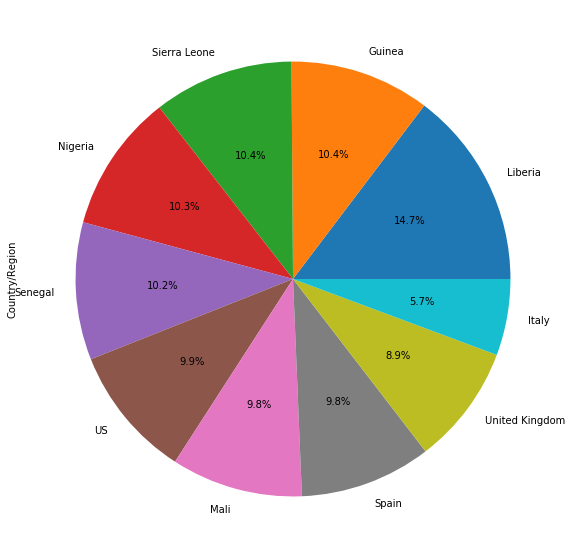

In [80]:
plt.figure(figsize=(20,10))
ebola['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

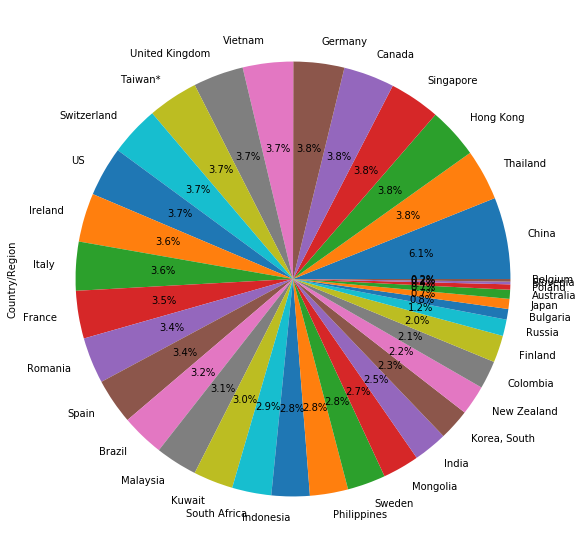

In [81]:
plt.figure(figsize=(20,10))
sars['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

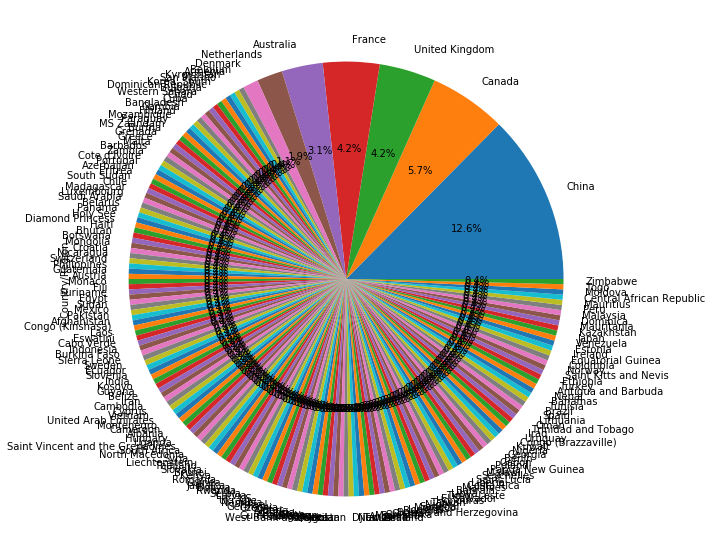

In [82]:
plt.figure(figsize=(20,10))
covid['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [83]:
# Geopandas
gdf_ebola = gpd.GeoDataFrame(ebola,geometry=gpd.points_from_xy(ebola['Long'],ebola['Lat']))

In [84]:
gdf_ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long,geometry
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600,POINT (-9.69660 9.94560)
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300,POINT (8.67530 9.08200)
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
...,...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500,POINT (-9.42950 6.42810)
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000,POINT (12.00000 43.00000)
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300,POINT (8.67530 9.08200)


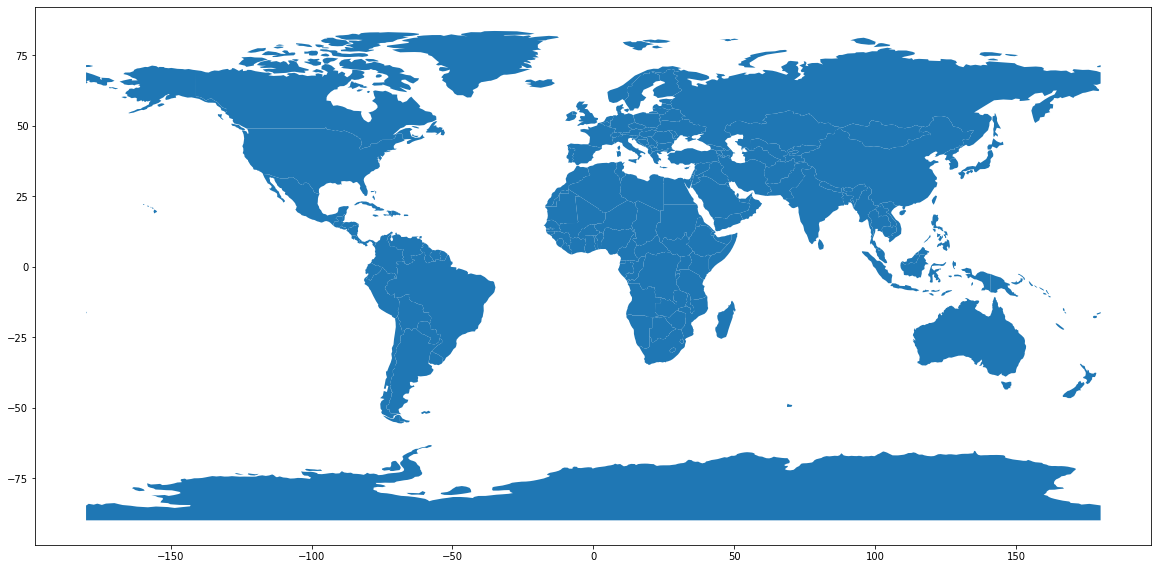

In [85]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20,10))

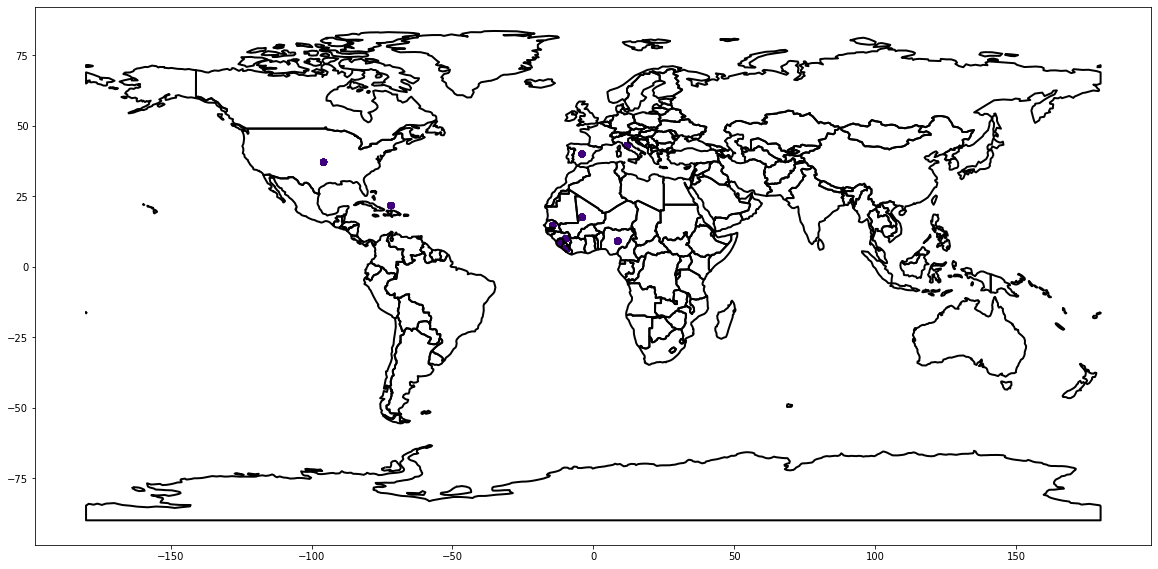

In [87]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [89]:
# Geopandas
gdf_sars = gpd.GeoDataFrame(sars,geometry=gpd.points_from_xy(sars['Long'],sars['Lat']))

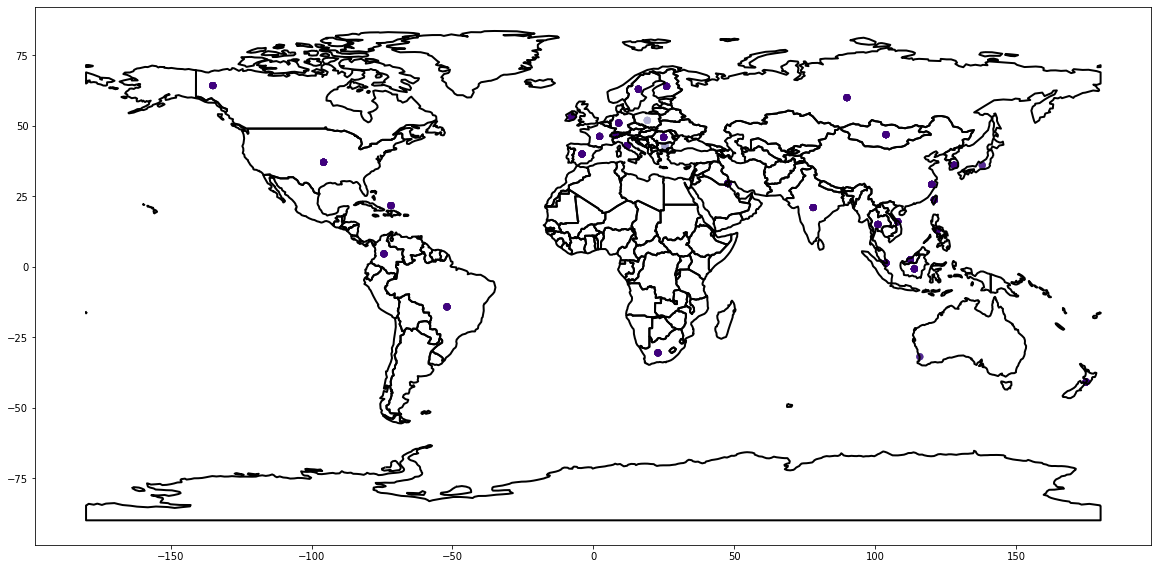

In [90]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_sars.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [92]:
# Geopandas
gdf_covid = gpd.GeoDataFrame(covid,geometry=gpd.points_from_xy(covid['Long'],covid['Lat']))

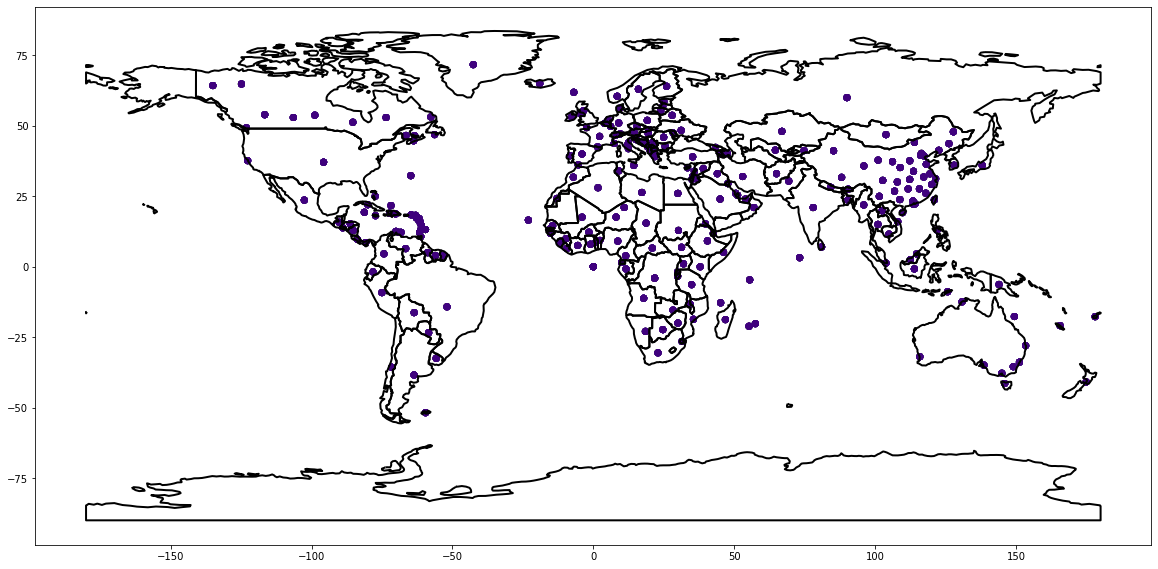

In [94]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_covid.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)